<a href="https://colab.research.google.com/github/shinebalance/mystudying-icrawler2gcs/blob/master/load_image_fromGCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【GCSからのデータ読み込み】
* GCSから画像データを取り込みたい！

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0   8371      0 --:--:-- --:--:-- --:--:--  8371
OK
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,278 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.30.0_amd64.deb ...
Unpacking gcsfuse (0.30.0) ...
Setting up gcsfuse (0.30.0) ...


In [3]:
!mkdir imgOnColab
# gcsfuse [バケット名] imgOnColab 
!gcsfuse befree-storage imgOnColab

Using mount point: /content/imgOnColab
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


* 今回マウントしたディレクトリの中には'new balance shoes'というディレクトリがある
* これをマウントしたいと思い色々試したところ、対応する名前でディレクトリを作ると中身も含めてアクセスできるようになる！びっくり
* [stackoverflow Folders not showing up in Bucket storage](https://stackoverflow.com/questions/38311036/folders-not-showing-up-in-bucket-storage)
* [github](https://github.com/GoogleCloudPlatform/gcsfuse/blob/master/docs/semantics.md#implicit-directories)

In [4]:
! mkdir imgOnColab/new\ balance\ shoes

mkdir: cannot create directory ‘imgOnColab/new balance shoes’: File exists


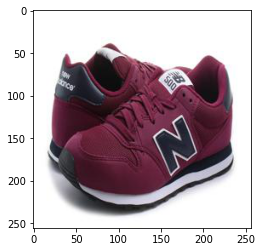

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np


im = Image.open('./imgOnColab/new balance shoes/000001.jpg')

#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

以上